In [1]:
import numpy as np

## Numpy
Numpy is the python library you will use to manipulate vectors, matrices, and densors. In Numpys these mathematical objects are all implemented as "arrays". This tutorial will show you how to create and manipulate arrays

Note: this tutorial is an example of an ipython "notebook". For a tutorial on installing and using notebooks, go here:

http://cs231n.github.io/ipython-tutorial/

Other note: there are many great python tutorials in notebook format. For example, the current tutorial borrows heavily from:

https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb



### Arrays
"A numpy array is a grid of values, all of the same type, indezed by a non-negative integers."

Here we implement a simple vector with 3 elements as an array

In [2]:
x = np.array([1,2,3])
print x

[1 2 3]


Like all things in python, x is an object with associated attributes and methods.

One important attribute is array "shape"

In [3]:
print x.shape

(3,)


the shape attribute is a tuple of numbers giving the size of each dimension. One important thing to note is that numpy distinguishes between 1D arrays like x, which is neither a row or column vector, and 2D arrays with shape tuples that look like (1,D), for example:

In [17]:
y = np.array([1,2,3],ndmin=2)
print 'shape of y: %s' % (y.shape,)
print 'shape of x: %s' % (x.shape,)

shape of y: (1, 3)
shape of x: (3,)


The key difference is the "ndmin" argument, which disambiguates by allowing you to specify the minimum number of dimensions. There's an attribute for number of dimensions too

In [26]:
print "number of x dimensions: %d" %x.ndim
print "number of y dimensions: %d" %y.ndim

number of x dimensions: 1
number of y dimensions: 2


We can create arrays with more dimensions by passing lists of lists

In [18]:
z = np.array([[1,2,3], [4,5,6], [7,8,9]])
print z

[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Exercise:
Create a 3D array with shape tuple (2,2,2) using a nested list construction

In [ ]:
###your code here

numpy provides all sorts of ways to initialize newly create arrays

In [21]:
a = np.zeros((1,2)) 
print a

[[ 0.  0.]]


the (1,2) tuple argument passed to "zeros" determines the array's shape

In [27]:
b = np.ones((2,2,2))
print b

[[[ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]]]


In [28]:
c = np.full((2,2),7)
print c

[[ 7.  7.]
 [ 7.  7.]]


/home/tnaselar/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((2, 2), 7) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [30]:
d = np.eye(6)
print d

[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]


In [31]:
f = np.random.random((3,3)) ##random values between 0,1
print f

[[ 0.55065332  0.38950562  0.46931128]
 [ 0.14891025  0.05831323  0.11035116]
 [ 0.49404997  0.09112804  0.13443496]]


#### Exercise
Create a (3,3) array of numbers in the range (1,2)

In [33]:
##your code here

### Array shape manipulation
Sometimes you will want to change the shape of your array. For example, suppose we have a 16 x 16 image and we want to turn into in a flat array.

In [38]:
img = np.random.random((16,16))
print img.shape


(16, 16)


In [37]:
flat_img = img.ravel()
print flat_img.shape

(256,)


Now, let's retain the image format


In [39]:
img2 = flat_img.reshape((16,16))
print img2.shape

(16, 16)


finally, the transpose operation is built-in into each array

In [48]:
x = np.ones((10,5))
print x.shape
y = x.T
print y.shape

(10, 5)
(5, 10)


#### Exercise 
Construct a 9 x 16 x 16 "movie" of random, 16x16 images. Reformat the movie into a flat 3x3 "montage" of the individual frames.

In [ ]:
### your code here

### Array indexing
To retrieve specific elements on an array, we can use the bracket notation []. This is called "slicing"

In [60]:
z = np.array([[1,2,3,10], [4,5,6,11], [7,8,9,12]])
print z

[[ 1  2  3 10]
 [ 4  5  6 11]
 [ 7  8  9 12]]


In [61]:
##equivalent ways to get the first row
print z[0]
print z[0,:]



[ 1  2  3 10]
[ 1  2  3 10]


In [62]:
##get first column
print z[:,0]

[1 4 7]


In [63]:
##get the first element
z[0,0]

1

In [64]:
##get the last element of first row
z[0,-1]

10

In [65]:
##get everything but the last element of the first row
z[0,:-1]

array([1, 2, 3])

In [66]:
##access the second row, returning a 1D array
print z[1,:], z[1,:].shape

[ 4  5  6 11] (4,)


In [67]:
##access the second rown, returning a 2D array
print z[1:2,:], z[1:2,:].shape

[[ 4  5  6 11]] (1, 4)


In [71]:
##submatrix in the bottom corner
print z[1:,-2:]


[[ 6 11]
 [ 9 12]]


Integer indexing: instead of slicing, pass lists (or tuples) of indices

In [70]:
##access every other element of first row
print z[0,[0,2,]]
##or
print z[0,[1,-1]]

[1 3]
[ 2 10]


In [74]:
##access lists of individual elements specified by (i,j) pairs: for example, the diagonal
print z[[0,1,2], [0,1,2]]
##is just like
print np.array([z[0,0], z[1,1], z[2,2]])

[1 5 9]
[1 5 9]


Boolean indexing: pass an array or list of True/False elements. Must match shape of original array or errors/weird things can happen.

In [77]:
##convert array to booleans
z > 5

array([[False, False, False,  True],
       [False, False,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [78]:
##to get a 1D array of all the elements marked "true" we can just go
print z[z>5]

[10  6 11  7  8  9 12]


### Array assignment
Here's something you need to know: if you assign an indexed array element to a new variable, modifications to that new variable will modify the original indexed array!

In [144]:
z = np.array([[1,2,3,10], [4,5,6,11], [7,8,9,12]])
x = z[0,:]
print x
print x[0]

[ 1  2  3 10]
1


In [145]:
x[0] = 0
print x[0]
print z[0,0]

0
0


...NOTE: if we reference only a single element of z, changes to the referencing variable no longer modify original array!!

In [150]:
x = z[0,0]  ##x is now a simple scalar
print x, x.shape
##changes to x don't propagate back to z
x += 10
print x
print z[0,0]

0 ()
10
0


### Math

In [79]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print x + y
print np.add(x, y)

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [ ]:
# Elementwise difference; both produce the array
print x - y
print np.subtract(x, y)

In [ ]:
# Elementwise product; both produce the array
print x * y
print np.multiply(x, y)

In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print x / y
print np.divide(x, y)

Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum


In [ ]:
x = np.array([[1,2],[3,4]])

print np.sum(x)  # Compute sum of all elements; prints "10"
print np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
print np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

### Broadcasting
This is an involved subject, but note that if we want to add the same row to every row of a matrix, we can do this


In [119]:
##add 
x = np.random.randn(2,100000)
print x.shape
z = np.ones((2,1))
print 'plus'
print z.shape
y = x+z
print 'makes'
print y.shape
print '\n'

##notice we've changed the mean
print 'mean of cols in x: %s' %(np.mean(x,axis=1),)
print 'mean of cols in y: %s' %(np.mean(y,axis=1),)

(2, 100000)
plus
(2, 1)
makes
(2, 100000)


mean of cols in x: [ 0.00296665  0.00288051]
mean of cols in y: [ 1.00296665  1.00288051]


Now try the same thing, but with a subtle change: the added vector "z" is now 1D.


In [139]:
##add 
x = np.random.randn(2,100000)
print x.shape
z = np.ones((2))
print 'plus'
print z.shape
print 'makes'
y = x+z
print y.shape
print '\n'

(2, 100000)
plus
(2,)
makes


ValueError: operands could not be broadcast together with shapes (2,100000) (2,) 

##### This is why it's important to observe the difference between arrays with shape (1,D) and (D,) !!!!

### Plotting

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

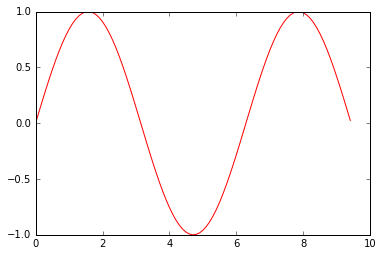

In [123]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y, 'r')  ##'r' makes it red

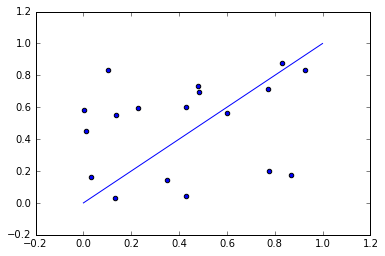

In [85]:
##A scatter plot
x = np.random.random((1,18))
y = np.random.random((1,18))
plt.scatter(x,y)
plt.plot(np.linspace(0,1,), np.linspace(0,1)) ##default color is blue

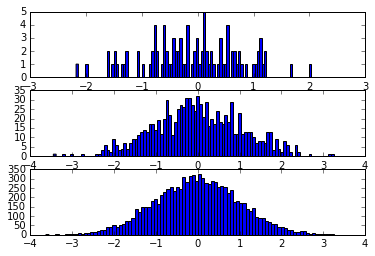

In [92]:
##A histogram
plt.subplot(3,1,1)
x = np.random.randn(100)
_=plt.hist(x,bins=100)
plt.subplot(3,1,2)
x = np.random.randn(1000)
_=plt.hist(x,bins=100)
plt.subplot(3,1,3)
x = np.random.randn(10000)
_=plt.hist(x,bins=100)

#### Exercise
Generate some fake data: two clouds of points in the plain, one centered at (-2,2) and another centered at (2,-2).
Make a 3-panel plot with the following
1) A scatterplot with the different clouds of points in two different colors
2) A histogram of the data distribution along the x-axis
3) A histogram of the data distribution along the y-axis



In [135]:
x = np.random.randn(2,1000)+np.array([-2,2],ndmin=2).T
y = np.random.randn(2,1000)+np.array([2,-2],ndmin=2).T

(-6.0, 6.0, -8.0, 6.0)

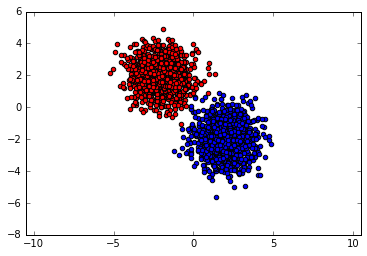

In [137]:
plt.scatter(x[0,:],x[1,:],c='r')
plt.scatter(y[0,:],y[1,:],c='b')
plt.axis('equal')